# Mood Prediction Using Smartphone Data
### Data Mining Techniques | Vrije Universiteit Amsterdam | April 2024
##### Lieve Jilesen (ljn278), Ryan Ott (rot280), and Jaime Perez y Perez (jpz240) | Group 17

## 1 - Data Preparation

### 1.1 - Exploratory Data Analysis

#### Importing packages & loading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# sns.set(style="whitegrid")
# import statsmodels.api as sm

file_path = 'data/dataset_mood_smartphone.csv'
df = pd.read_csv(file_path, parse_dates=['time'], index_col=0)
df

id                    time        variable   value
1        AS14.01 2014-02-26 13:00:00.000            mood   6.000
2        AS14.01 2014-02-26 15:00:00.000            mood   6.000
3        AS14.01 2014-02-26 18:00:00.000            mood   6.000
4        AS14.01 2014-02-26 21:00:00.000            mood   7.000
5        AS14.01 2014-02-27 09:00:00.000            mood   6.000
...          ...                     ...             ...     ...
2770399  AS14.30 2014-04-11 07:51:16.948  appCat.weather   8.032
2772465  AS14.30 2014-04-19 11:00:32.747  appCat.weather   3.008
2774026  AS14.30 2014-04-26 10:19:07.434  appCat.weather   7.026
2774133  AS14.30 2014-04-27 00:44:48.450  appCat.weather  23.033
2784435  AS14.32 2014-04-07 18:25:14.036  appCat.weather  22.431

[376912 rows x 4 columns]

#### General data properties

In [2]:
num_records = df.shape[0]
num_participants = df.id.nunique()
num_days = df.time.dt.date.nunique()
num_variables = df.variable.nunique()

data_characteristics = {
    "Number of Records": [num_records],
    "Number of Participants": [num_participants],
    "Number of Days": [num_days],
    "Number of Variables": [num_variables],
}

data_characteristics_df = pd.DataFrame(data_characteristics)
data_characteristics_df

Number of Records  Number of Participants  Number of Days  \
0             376912                      27             113   

   Number of Variables  
0                   19

#### Variable properties

In [3]:
def create_summary_df(df):
    # Create a summary table for the dataset
    summary_data = {
        "Variable": [],
        "Data Type": [],
        "Total Records": [],
        "Unique Values": [],
        "Missing Values": [],
        "Mean": [],
        "Std": [],
        "Min": [],
        "25%": [],
        "50%": [],
        "75%": [],
        "Max": []
    }

    for var in df.variable.unique():
        var_data = df[df['variable'] == var]['value']
        desc = var_data.describe()
        summary_data["Variable"].append(var)
        summary_data["Data Type"].append(df[df['variable'] == var]['value'].dtype)
        summary_data["Total Records"].append(var_data.count())
        summary_data["Unique Values"].append(var_data.nunique())
        summary_data["Missing Values"].append(df[df['variable'] == var]['value'].isnull().sum())
        summary_data["Mean"].append(desc['mean'])
        summary_data["Std"].append(desc['std'])
        summary_data["Min"].append(desc['min'])
        summary_data["25%"].append(desc['25%'])
        summary_data["50%"].append(desc['50%'])
        summary_data["75%"].append(desc['75%'])
        summary_data["Max"].append(desc['max'])

    return pd.DataFrame(summary_data)

In [4]:
summary_df = create_summary_df(df)
summary_df

Variable Data Type  Total Records  Unique Values  \
0                   mood   float64           5641             10   
1     circumplex.arousal   float64           5597              5   
2     circumplex.valence   float64           5487              5   
3               activity   float64          22965           1868   
4                 screen   float64          96578          64646   
5                   call   float64           5239              1   
6                    sms   float64           1798              1   
7         appCat.builtin   float64          91288          23237   
8   appCat.communication   float64          74276          39890   
9   appCat.entertainment   float64          27125          12575   
10        appCat.finance   float64            939            729   
11           appCat.game   float64            813            792   
12         appCat.office   float64           5642           3178   
13          appCat.other   float64           7650           5014   
14         appCat.social   float64          19145          14660   
15         appCat.travel   float64           2846           2606   
16        appCat.unknown   float64            939            846   
17      appCat.utilities   float64           2487           1732   
18        appCat.weather   float64            255            250   

    Missing Values        Mean         Std        Min       25%        50%  \
0                0    6.992555    1.032769      1.000   7.00000   7.000000   
1               46   -0.098624    1.051868     -2.000  -1.00000   0.000000   
2              156    0.687808    0.671298     -2.000   0.00000   1.000000   
3                0    0.115958    0.186946      0.000   0.00000   0.021739   
4                0   75.335206  253.822497      0.035   5.32225  20.044500   
5                0    1.000000    0.000000      1.000   1.00000   1.000000   
6                0    1.000000    0.000000      1.000   1.00000   1.000000   
7                0   18.538262  415.989243 -82798.871   2.02000   4.038000   
8                0   43.343792  128.912750      0.006   5.21800  16.225500   
9                0   37.576480  262.960476     -0.011   1.33400   3.391000   
10               0   21.755251   39.218361      0.131   4.07200   8.026000   
11               0  128.391615  327.145246      1.003  14.14800  43.168000   
12               0   22.578892  449.601382      0.003   2.00400   3.106000   
13               0   25.810839  112.781355      0.014   7.01900  10.028000   
14               0   72.401906  261.551846      0.094   9.03000  28.466000   
15               0   45.730850  246.109307      0.080   5.08650  18.144000   
16               0   45.553006  119.400405      0.111   5.01800  17.190000   
17               0   18.537552   60.959134      0.246   3.15850   8.030000   
18               0   20.148714   24.943431      1.003   8.68400  15.117000   

           75%        Max  
0     8.000000     10.000  
1     1.000000      2.000  
2     1.000000      2.000  
3     0.158333      1.000  
4    62.540250   9867.007  
5     1.000000      1.000  
6     1.000000      1.000  
7     9.922000  33960.246  
8    45.475750   9830.777  
9    14.922000  32148.677  
10   20.155000    355.513  
11  123.625000   5491.793  
12    8.043750  32708.818  
13   16.829250   3892.038  
14   75.372000  30000.906  
15   47.227250  10452.615  
16   44.430500   2239.937  
17   19.331000   1802.649  
18   25.349000    344.863

#### Any records missing id or time?

In [5]:
# Do we have any records without index, id or time?
df[df['id'].isnull() | df['time'].isnull()]

Empty DataFrame
Columns: [id, time, variable, value]
Index: []

No, thankfully not.

#### Distribution of variable values

In [6]:
def plot_vars_dist(df):
    variables = [var for var in df['variable'].unique() if var not in ['sms', 'call']]  # ignoring these as they are only 1 value indicating occurence of a call/sms
    fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 6 * len(variables)))

    for ax, var in zip(axes.flatten(), variables):
        var_data = df[df['variable'] == var]['value'].dropna()
        mean = var_data.mean()
        std = var_data.std()
        # Adjust bins for better visualization based on data range and characteristics
        bins = min(30, int(var_data.nunique()))  # Use a minimum of 30 bins or less if fewer unique values

        ax.hist(var_data, bins=bins, alpha=0.75, color='blue', edgecolor='black', label=f'{var} Scores')
        ax.set_title(f'Distribution of {var} values')
        ax.set_xlabel(f'{var.capitalize()} Score')
        ax.set_ylabel('Frequency')
        ax.grid(axis='y', alpha=0.75)
        legend_label = f"Mean: {mean:.2f}, Std: {std:.2f}"
        ax.legend([f"{var.capitalize()} Scores\n{legend_label}"], loc='upper right', title='Statistics', frameon=True)

    plt.tight_layout()
    plt.show()

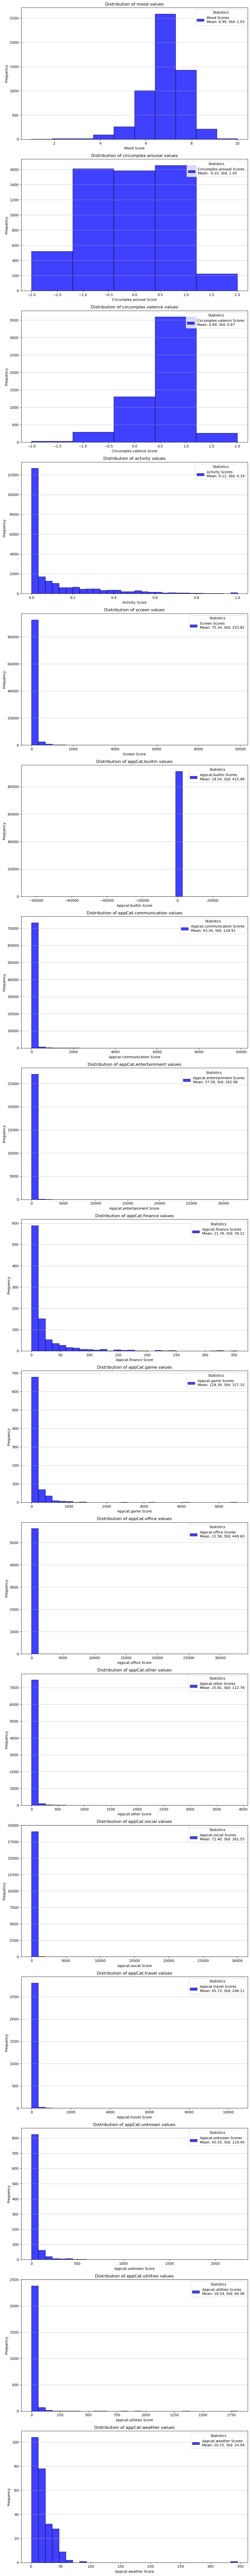

In [7]:
plot_vars_dist(df)

Histograms showing the distribution of possible values for the different (non-boolean) variables in our dataset. The mood, valence and arousal of participants seems to be normally distributed with different means and variances. All other variables seem to perhaps follow an exponential distribution, with most mass close to 0 and decreasing number of records with higher values. We do also see outliers present in the exponentially distributed data.

#### Mood for a participant

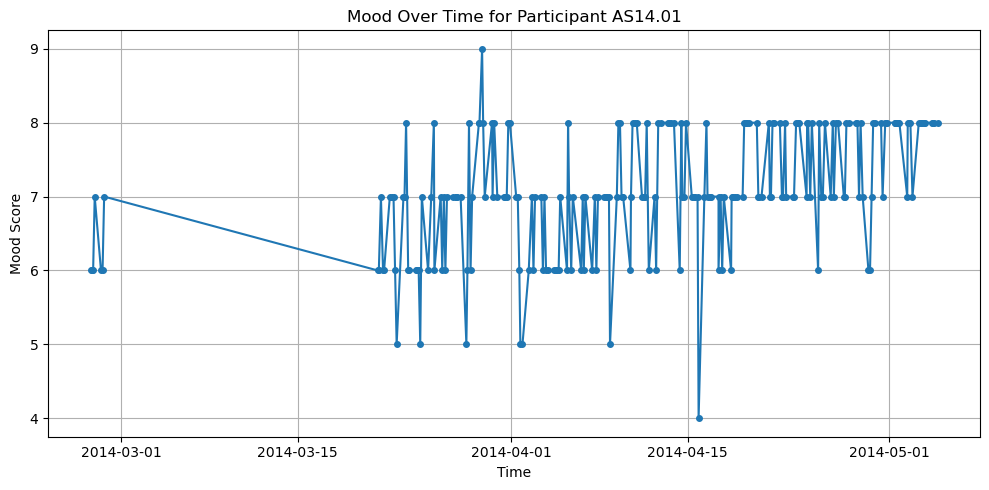

In [8]:
# Time Series of Mood for a Selected Participant
participant_data = df[(df['id'] == 'AS14.01') & (df['variable'] == 'mood')]
plt.figure(figsize=(10, 5))
plt.plot(participant_data['time'], participant_data['value'], marker='o', markersize=4, linestyle='-')
plt.title('Mood Over Time for Participant AS14.01')
plt.xlabel('Time')
plt.ylabel('Mood Score')
plt.xticks()
plt.grid()
plt.tight_layout()
plt.show()

Timeseries plot of the mood scores given by the first participant. We see it being around 7 +- 1 for most of the time, with rare moments of more extreme emotions. We also see long gaps in the record availability.

#### Correlation map for variables with mood

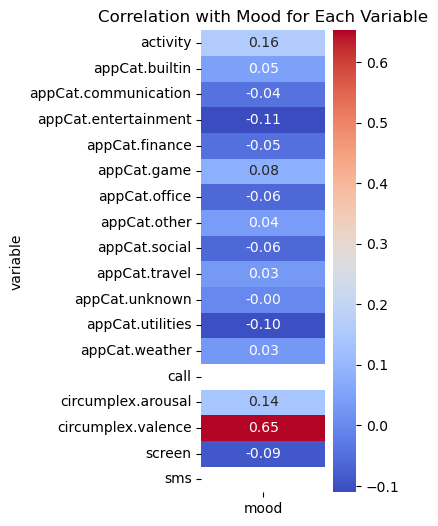

In [9]:
data = df.groupby(['id', 'variable', df['time'].dt.date])['value'].mean()
data = data.reset_index()
data['value'] = data['value'].astype(float)
data['time'] = data['time'].astype("string")
data.loc[data['variable'] == 'mood', 'value'] = np.round(data.loc[data['variable'] == 'mood', 'value'])

# Create pivot table
pivot_table = data.pivot_table(index=['id', 'time'], columns='variable', values='value', aggfunc='mean')
correlation_matrix = pivot_table.corr()

# Filter to only show correlations of all variables with 'mood'
mood_correlations = correlation_matrix[['mood']].drop(index='mood')

# Plot the heatmap
plt.figure(figsize=(2, 6))
sns.heatmap(mood_correlations, annot=True, fmt=".2f", cmap='coolwarm', vmin=mood_correlations.min(), vmax=mood_correlations.max())
plt.title('Correlation with Mood for Each Variable')
plt.xlabel('')
plt.show()

In [10]:
#*** OLD NOT USED ***
# Correlation heatmap of variables
# data = df.groupby(['id','variable',df['time'].dt.date])['value'].mean()
# data = data.reset_index()
# data['value'] = data['value'].astype(float)
# data['time'] = data['time'].astype("string")
# data.loc[data['variable'] == 'mood', 'value'] = np.round(data.loc[data['variable'] == 'mood', 'value'])

# pivot_table = data.pivot_table(index=['id', 'time'], columns='variable', values='value', aggfunc='mean')
# correlation_matrix = pivot_table.corr()

# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
# plt.title('Correlation Heatmap of Variables')
# plt.show()

The heatmap of correlation of all variables with mood, providing a color-coded representation of the correlation values, with warmer colors indicating stronger positive correlations and cooler colors indicating stronger negative correlations. (`call` and `sms` are not visible as they are only recorded when a call takes place so it always has a value of 1).
Valence especially seems to be highly positively corellated with mood, while using entertainment apps for longer seems to correlate most negatively with mood. These could be valuable insights into predicting the mood for participants based on usage behaviour.

#### Activity & mood relationship

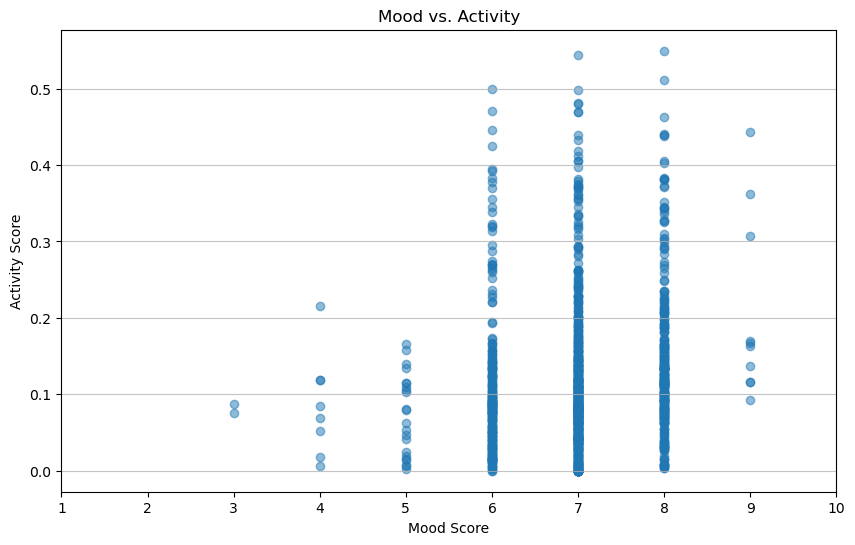

In [11]:
# Activity and Mood Relationship
activity_data = data[data['variable'] == 'activity']
mood_data = data[data['variable'] == 'mood']

# Merging on ID and Time for direct comparison
activity_mood_merged = pd.merge(activity_data, mood_data, on=['id', 'time'], suffixes=('_activity', '_mood'))

plt.figure(figsize=(10, 6))
plt.scatter(activity_mood_merged['value_mood'], activity_mood_merged['value_activity'], alpha=0.5)
plt.title('Mood vs. Activity')
plt.xlabel('Mood Score')
plt.ylabel('Activity Score')
plt.xticks(range(1, 11))
plt.grid(axis='y', alpha=0.75)
plt.show()

Plot showing co-occurence of mood with activiy scores for all participants. If the mood is in the common range of 7±1 we see participants record a wide range of activity scores, while if the mood is low, there is no high activity. 

### 1.2 - Data Cleaning

#### Adapting datatypes

Because call and sms are boolean (only present if true) we convert them to boolean values.

In [12]:
# Convert 'call' and 'sms' data to boolean - !! Removed for now because it impacts performance negatively
# for variable in ['call', 'sms']:
#     df.loc[df['variable'] == variable, 'value'] = df[df['variable'] == variable]['value'].fillna(0).astype(bool)

#### Removing incorrect values

Because all `appCat.*` variables and `screen` should denote a time duration, they cannot be negative. Thus, any records with negative duration must be incorrect and removed. We see this is the case for example when looking at the variables properties table under section 1.1, where the min value for `appCat.builtin` is highly negative.

In [13]:
# List of variables denoting time durations
time_variables = [var for var in df['variable'].unique() if 'appCat.' in var or var == 'screen']

# Remove records with negative durations for time variables
print("Removed records due to negative values:")
initial_count = df.shape[0]
for var in time_variables:
    before_count = df[df['variable'] == var].shape[0]
    df = df[~((df['variable'] == var) & (df['value'] < 0))]
    after_count = df[df['variable'] == var].shape[0]
    print(f"{before_count - after_count} from {var}")

total_removed = initial_count - df.shape[0]
print(f"Total records removed: {total_removed}")

Removed records due to negative values:
0 from screen
3 from appCat.builtin
0 from appCat.communication
1 from appCat.entertainment
0 from appCat.finance
0 from appCat.game
0 from appCat.office
0 from appCat.other
0 from appCat.social
0 from appCat.travel
0 from appCat.unknown
0 from appCat.utilities
0 from appCat.weather
Total records removed: 4


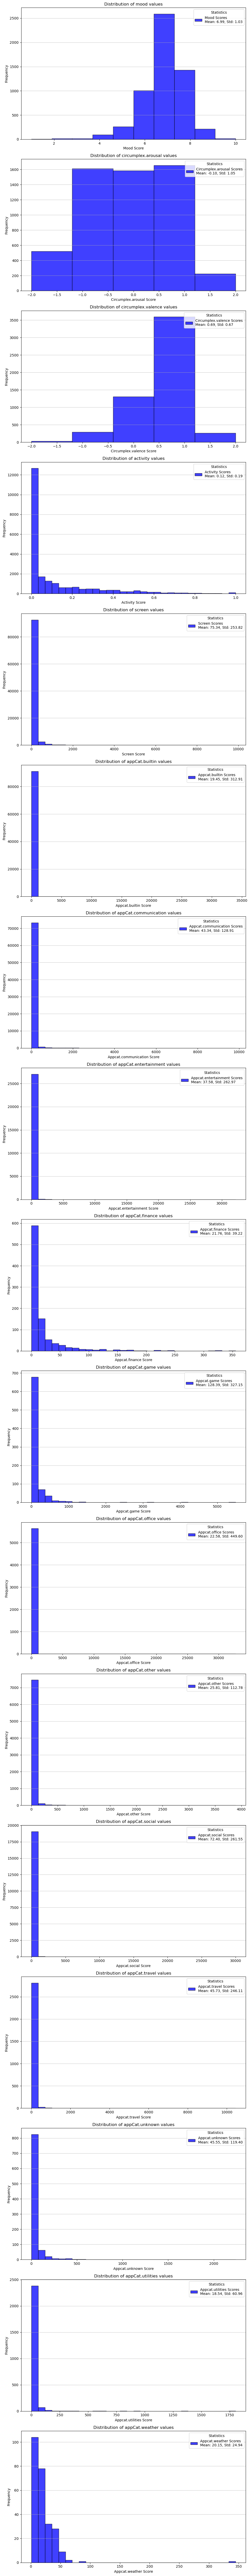

In [14]:
plot_vars_dist(df)

#### Removing extreme values

For numeric variables that are not self-reported by the participants (so not `mood`, `arousal`, `valence`, & `activity`, and also not `call` or `SMS`) we remove values that lie outside of the interquartile range (IQR). To do this, we first calculate the IQR, which is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. Values that fall below $Q1 - 1.5 * IQR$ or above $Q3 + 1.5 * IQR$ are considered outliers and are thus excluded from the analysis to prevent them from skewing the results. Its better suited for this scenario because unlike using the z-score method for example, this method doesn't necessarily assume an underlying normal distribution.

In [15]:
# Outlier removal using the Interquartile Range (IQR) method
def remove_iqr_outliers(df, variable, iqr_range=1.5):  # set iqr_range to higher to exclude fewer
    # Filter the dataset for a specific variable
    filter_df = df[df['variable'] == variable]
    Q1 = filter_df['value'].quantile(0.25)
    Q3 = filter_df['value'].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - iqr_range * IQR
    upper_bound = Q3 + iqr_range * IQR

    # Filtering out outliers
    before_removal = filter_df.shape[0]
    filtered_df = filter_df[(filter_df['value'] >= lower_bound) & (filter_df['value'] <= upper_bound)]
    after_removal = filtered_df.shape[0]

    print(f'{before_removal - after_removal} outliers from {variable}')
    return df[(df['variable'] != variable) | ((df['value'] >= lower_bound) & (df['value'] <= upper_bound))]

In [16]:
# Variables for which we remove outliers
# store the count of each variable in a dict
exclude_vars = ['mood', 'circumplex.arousal', 'circumplex.valence', 'activity', 'call', 'sms']
outlier_vars = [var for var in df['variable'].unique() if var not in exclude_vars]

print('Removed outliers using IQR method:')
initial_count = df.shape[0]
for var in outlier_vars:
    df = remove_iqr_outliers(df, var)
total_removed = initial_count - df.shape[0]
print(f"Total records removed: {total_removed}")

Removed outliers using IQR method:
10055 outliers from screen
10150 outliers from appCat.builtin
6401 outliers from appCat.communication
4517 outliers from appCat.entertainment
118 outliers from appCat.finance
85 outliers from appCat.game
848 outliers from appCat.office
1000 outliers from appCat.other
1838 outliers from appCat.social
181 outliers from appCat.travel
80 outliers from appCat.unknown
182 outliers from appCat.utilities
10 outliers from appCat.weather
Total records removed: 35465


In [17]:
summary_df = create_summary_df(df)
summary_df

Variable Data Type  Total Records  Unique Values  \
0                   mood   float64           5641             10   
1     circumplex.arousal   float64           5597              5   
2     circumplex.valence   float64           5487              5   
3               activity   float64          22965           1868   
4                 screen   float64          86523          54685   
5                   call   float64           5239              1   
6                    sms   float64           1798              1   
7         appCat.builtin   float64          81135          14334   
8   appCat.communication   float64          67875          33604   
9   appCat.entertainment   float64          22607           8234   
10        appCat.finance   float64            821            611   
11           appCat.game   float64            728            707   
12         appCat.office   float64           4794           2346   
13          appCat.other   float64           6650           4017   
14         appCat.social   float64          17307          12826   
15         appCat.travel   float64           2665           2425   
16        appCat.unknown   float64            859            766   
17      appCat.utilities   float64           2305           1550   
18        appCat.weather   float64            245            240   

    Missing Values       Mean        Std    Min       25%        50%  \
0                0   6.992555   1.032769  1.000   7.00000   7.000000   
1               46  -0.098624   1.051868 -2.000  -1.00000   0.000000   
2              156   0.687808   0.671298 -2.000   0.00000   1.000000   
3                0   0.115958   0.186946  0.000   0.00000   0.021739   
4                0  29.914995  33.657583  0.035   5.20100  15.514000   
5                0   1.000000   0.000000  1.000   1.00000   1.000000   
6                0   1.000000   0.000000  1.000   1.00000   1.000000   
7                0   5.208883   4.571340  0.001   2.00800   3.665000   
8                0  23.674507  24.677206  0.006   5.09550  13.321000   
9                0   5.325442   6.822312  0.001   1.07350   2.405000   
10               0  10.191018   9.281733  0.131   4.01400   7.025000   
11               0  59.740750  65.223873  1.003  12.90600  34.869500   
12               0   3.975585   3.378695  0.003   1.77275   3.009000   
13               0  10.190050   6.360926  0.014   6.05400   9.039000   
14               0  38.415498  40.500624  0.094   7.38600  23.105000   
15               0  26.027416  26.208979  0.080   5.01500  15.652000   
16               0  22.608378  23.543593  0.111   4.22300  13.132000   
17               0  10.524939   9.589525  0.246   3.04600   7.023000   
18               0  17.370894  12.076317  1.003   8.16200  15.076000   

          75%      Max  
0    8.000000   10.000  
1    1.000000    2.000  
2    1.000000    2.000  
3    0.158333    1.000  
4   43.122500  148.350  
5    1.000000    1.000  
6    1.000000    1.000  
7    7.015500   21.764  
8   34.969500  105.855  
9    6.038000   35.293  
10  13.049000   44.249  
11  80.952250  287.333  
12   5.020000   17.099  
13  13.045000   31.487  
14  56.319500  174.832  
15  39.798000  110.356  
16  33.816000  101.714  
17  15.315000   43.474  
18  24.193000   48.132

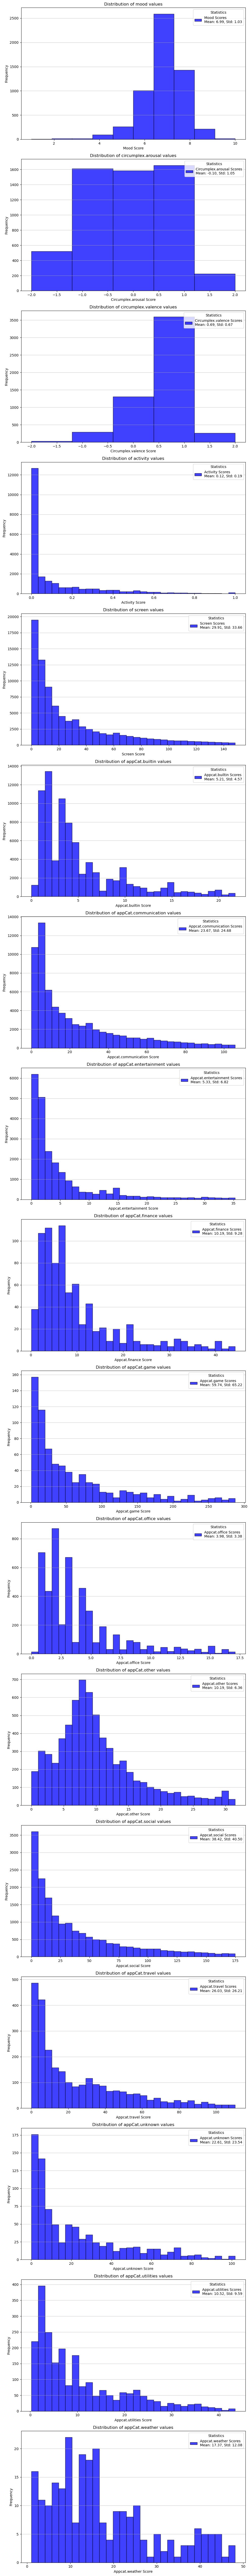

In [18]:
plot_vars_dist(df)

When comparing the histograms with those created before the cleaning, we no longer have few very high frequency bins and small bins extremely far away.

#### Imputing missing values

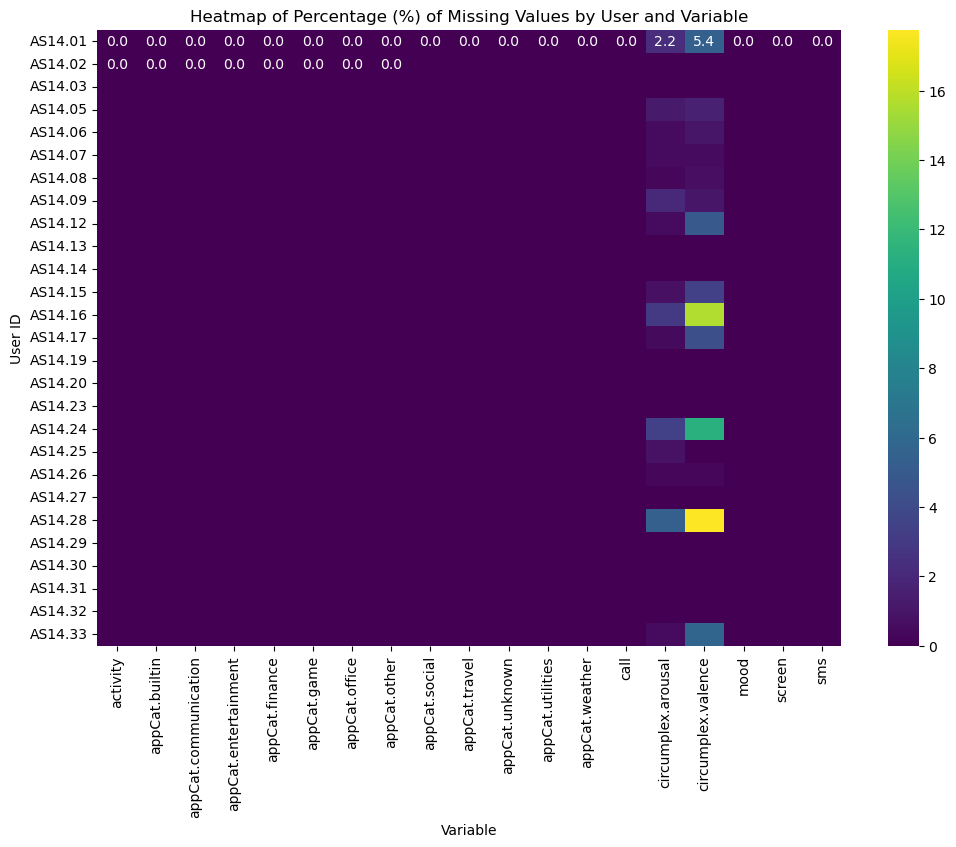

In [19]:
# Group the data by 'id' and 'variable' and count NaN values for each grouping
nan_counts = df.groupby(['id', 'variable']).apply(lambda x: x['value'].isnull().sum()).reset_index(name='Missing Values')

# Determine the total possible records for each user-variable combination
total_possible_records = df.groupby(['id', 'variable']).size().reset_index(name='Total Records')

# Merge the count of NaN values with the total possible records to calculate percentages
merged_counts = pd.merge(nan_counts, total_possible_records, on=['id', 'variable'])
merged_counts['Missing Percentage'] = (merged_counts['Missing Values'] / merged_counts['Total Records']) * 100

# Pivot the results to show the percentage of missing values: users on rows, variables on columns
nan_percentage_pivot = merged_counts.pivot(index='id', columns='variable', values='Missing Percentage').fillna(0)

# Plotting the heatmap of missing value percentages
plt.figure(figsize=(12, 8))
sns.heatmap(nan_percentage_pivot, annot=True, fmt=".1f", cmap='viridis')
plt.title('Heatmap of Percentage (%) of Missing Values by User and Variable')
plt.xlabel('Variable')
plt.ylabel('User ID')
plt.show()

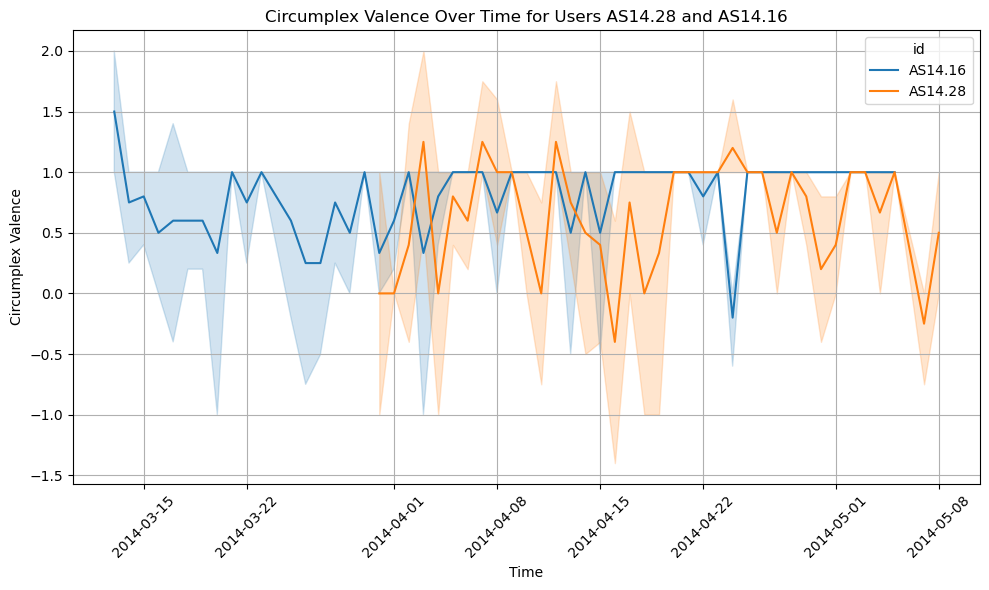

In [20]:
# create a plot showing the values for circumplex.valence of user AS14.28 and AS14.16 over time
# Filter the data for the two users and the variable
user_data = df[(df['id'].isin(['AS14.28', 'AS14.16'])) & (df['variable'] == 'circumplex.valence')]
user_data['time'] = user_data['time'].dt.date

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='value', hue='id', data=user_data)
plt.title('Circumplex Valence Over Time for Users AS14.28 and AS14.16')
plt.xlabel('Time')
plt.ylabel('Circumplex Valence')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

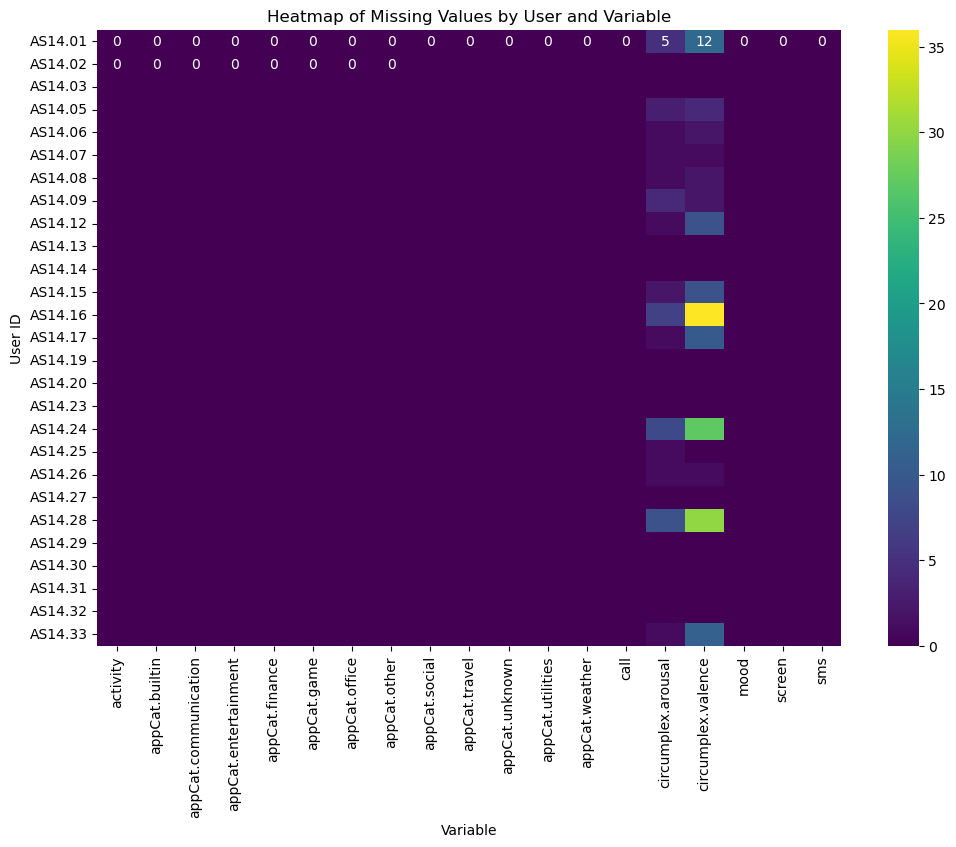

In [21]:
# Group the data by 'id' and 'variable' and count NaN values for each grouping
nan_counts = df.groupby(['id', 'variable']).apply(lambda x: x['value'].isnull().sum()).reset_index(name='Missing Values')

# Pivot the results to get a better visual representation: users on rows, variables on columns
nan_pivot = nan_counts.pivot(index='id', columns='variable', values='Missing Values').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(nan_pivot, annot=True, fmt="g", cmap='viridis')
plt.title('Heatmap of Missing Values by User and Variable')
plt.xlabel('Variable')
plt.ylabel('User ID')
plt.show()

Based on this heatmap, we see that NaN values only occur for the circumplex variables, most notably for valence. Furthermore, only a small subset of the participants have missing values.

Two common approaches for imputing missing values in time series data are:
1. Last Observation Carried Forward (LOCF): This method carries forward the last observed value.
2. Linear Interpolation: This method assumes that the change between two data points is linear and imputes the values accordingly.

We will apply both methods and then discuss which one might be more suitable.

In [22]:
# TODO: FIX IMPUTE CODE (doesnt compute stuff yet)

##### 1 - Last Observation Carried Forward (LOCF)

In [23]:
def impute_locf(df):
    # Apply LOCF imputation for each time series variable
    for var in df['variable'].unique():
        df.loc[df['variable'] == var, 'value'] = df.loc[df['variable'] == var, 'value'].fillna(method='ffill')
    return df

df_locf = impute_locf(df)

##### 2 - Linear Interpolation

In [24]:
def impute_linear_interpolation(df):
    # Apply linear interpolation for each time series variable
    for var in df['variable'].unique():
        df.loc[df['variable'] == var, 'value'] = df.loc[df['variable'] == var, 'value'].interpolate(method='linear')
    return df

df_linear = impute_linear_interpolation(df)

#### Evaluation of Imputation Methods

##### Visual Comparison

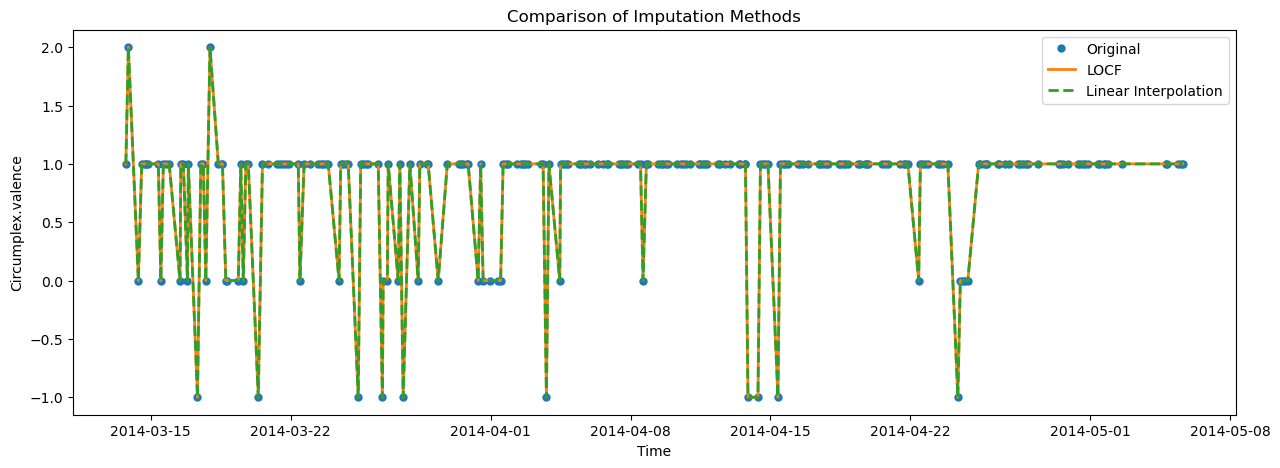

In [25]:
# Select a participant and variable for demonstration purposes
participant = 'AS14.16'
variable = 'circumplex.valence'  # Example variable

# Extract the series for the selected participant and variable
original_series = df[(df['id'] == participant) & (df['variable'] == variable)]
locf_series = df_locf[(df_locf['id'] == participant) & (df_locf['variable'] == variable)]
linear_series = df_linear[(df_linear['id'] == participant) & (df_linear['variable'] == variable)]

# Plotting the series to compare
plt.figure(figsize=(15, 5))
plt.plot(original_series['time'], original_series['value'], label='Original', marker='o', linestyle='', markersize=5)
plt.plot(locf_series['time'], locf_series['value'], label='LOCF', marker='', linestyle='-', linewidth=2)
plt.plot(linear_series['time'], linear_series['value'], label='Linear Interpolation', marker='', linestyle='--', linewidth=2)
plt.title('Comparison of Imputation Methods')
plt.xlabel('Time')
plt.ylabel(variable.capitalize())
plt.legend()
plt.show()


##### Statistical Comparison

In [26]:
# Compute summary statistics for the original and imputed datasets
summary_stats = pd.DataFrame({
    'Original': original_series['value'].describe(),
    'LOCF': locf_series['value'].describe(),
    'Linear': linear_series['value'].describe()
})

print(summary_stats)

         Original        LOCF      Linear
count  230.000000  230.000000  230.000000
mean     0.800000    0.800000    0.800000
std      0.515269    0.515269    0.515269
min     -1.000000   -1.000000   -1.000000
25%      1.000000    1.000000    1.000000
50%      1.000000    1.000000    1.000000
75%      1.000000    1.000000    1.000000
max      2.000000    2.000000    2.000000


##### Selection of Imputation Method (TODO RYAN)

Based on the evaluation, we will argue for the selected imputation method. For instance, if the data contains a strong trend or seasonality, linear interpolation may be more suitable. On the other hand, if the data are relatively stable with little variation between observations, LOCF might be the preferred choice.
We will also review scientific literature to support our choice, citing studies that have analyzed the performance of these imputation methods in similar scenarios.

For prolonged periods of missing data, neither LOCF nor linear interpolation may be appropriate as they can introduce significant bias. Instead, we can consider:
- Removing the series with prolonged gaps from the analysis.
- Using advanced imputation methods such as time series decomposition, which considers seasonality and trends.
- Applying machine learning methods like k-Nearest Neighbors or Recurrent Neural Networks to predict the missing values based on the patterns in the data.

#### Code to handle prolonged periods of missing data

Missing data can lead to a significant loss of information and can result in biased estimates if not handled properly. In our case, missing values must be addressed before moving forward with the analysis, as they may affect the accuracy of our mood prediction model.

In [27]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values' :missing_values, 'Percentage' : missing_percentage})
print(missing_data[missing_data['Missing Values'] > 0])

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []



Depending on the variable type and the missingness pattern, we might use different imputation techniques such as mean or median imputation for numerical variables and mode imputation for categorical variables. If the data is missing completely at random (MCAR), simple imputation strategies can be sufficient. However, if there is a pattern to the missingness, we might need to consider more advanced techniques like multiple imputation or model-based methods, which take into account the relationships between variables.

Let's proceed with imputation for numerical variables that are missing values:

In [28]:
from sklearn.impute import SimpleImputer

# Initialize the imputer to replace missing values with the mean of the column
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Apply imputation to each numeric variable column
for var in outlier_vars:
    df.loc[df['variable'] == var, 'value'] = mean_imputer.fit_transform(df[df['variable'] == var]['value'].values.reshape(-1,1))

# Check to confirm that there are no more missing values in the numerical columns
print(df.isnull().sum())

id          0
time        0
variable    0
value       0
dtype: int64


For the self-reported variables ('mood', 'circumplex.arousal', 'circumplex.valence', & 'activity'), we might want to use a different approach, as imputing them with the mean may not be appropriate due to the personal nature of these variables. We could consider using forward fill or backward fill to carry forward the previous value or the next value, respectively, as these scores are likely to be similar if they are recorded at frequent intervals.

In the case of 'call' and 'sms', which are boolean and primarily `1` when an event occurs, we assume that the absence of a record could be treated as a `0` (no event). However, we should carefully examine the context and determine if this assumption is valid before imputing missing values for these variables.

After imputing missing values, we will once again visualize the distribution of our variables and update our summary statistics table to ensure our data is ready for the next steps of our analysis pipeline.

Continue with the next steps, such as feature engineering, normalization, or splitting the dataset for training and testing, based on the cleaned and preprocessed data.

In [29]:
# Code to impute missing values
# ! GPT-4 code:
import pandas as pd

# Assuming 'df' is your DataFrame and 'time' is the index if not, set it accordingly
# df.set_index('time', inplace=True)

# Linear Interpolation
df_linear = df.copy()
for var in df['variable'].unique():
    if 'time' not in df.index.names:
        df_linear.loc[df_linear['variable'] == var, 'value'] = df_linear[df_linear['variable'] == var]['value'].interpolate(method='linear')

# Simple Exponential Smoothing
df_ses = df.copy()
for var in df['variable'].unique():
    if 'time' not in df.index.names:
        df_ses.loc[df_ses['variable'] == var, 'value'] = df_ses[df_ses['variable'] == var]['value'].fillna(method='pad').ewm(alpha=0.3).mean()

# Comparison of the impact
print("Linear Interpolation Sample:")
print(df_linear[df_linear['variable'] == 'mood']['value'].head(10))

print("Exponential Smoothing Sample:")
print(df_ses[df_ses['variable'] == 'mood']['value'].head(10))

Linear Interpolation Sample:
1     6.0
2     6.0
3     6.0
4     7.0
5     6.0
6     6.0
7     7.0
8     6.0
9     6.0
10    7.0
Name: value, dtype: float64
Exponential Smoothing Sample:
1     6.000000
2     6.000000
3     6.000000
4     6.394789
5     6.252425
6     6.166600
7     6.439058
8     6.299283
9     6.205723
10    6.450932
Name: value, dtype: float64


## Start on basic predicition

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, ZeroPadding1D, Masking

# # NOTE: this is still little basic format for the model, will maybe have to run on Google colab?


# x = df # input features
# y = df[df['variable'] == 'mood'] # target

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Transform data 
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

# x_train_reshaped = x_train_scaled.reshape(x_train_scaled.shape[0], x_train_scaled.shape[1], 1)
# x_test_reshaped = x_test_scaled.reshape(x_test_scaled.shape[0], x_test_scaled.shape[1], 1)

# # Define the CNN model, three layers
# model = Sequential([
#     Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train_reshaped.shape[1], 1)),
#     MaxPooling1D(pool_size=2),
#     Conv1D(filters=64, kernel_size=3, activation='relu'),
#     MaxPooling1D(pool_size=2),
#     Conv1D(filters=128, kernel_size=3, activation='relu'),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(1, activation='linear')
# ])

# model.compile(optimizer='adam', loss='mean_squared_error')

# model.fit(x_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(x_test_reshaped, y_test))

# loss = model.evaluate(x_test_reshaped, y_test)
# print(f'Test loss: {loss}')

# predictions = model.predict(x_test_reshaped)

In [31]:
entertainment_vars =  ['appCat.entertainment', 'appCat.game', 'appCat.social']
util_vars =  ['appCat.builtin', 'appCat.communication', 'appCat.travel', 'appCat.utilities', 'appCat.weather']
other_vars =  ['appCat.other', 'appCat.office', 'appCat.finance']

In [32]:
for variable in entertainment_vars:
    df.loc[df['variable'] == variable, 'variable'] = 'entertainment'
for variable in util_vars:
    df.loc[df['variable'] == variable, 'variable'] = 'util'
for variable in other_vars:
    df.loc[df['variable'] == variable, 'variable'] = 'other'

In [33]:
#df = df.drop([''],axis = 1)
df['time'] = pd.to_datetime(df['time'])
df_LSTM  = df
df_LSTM['time'] = pd.to_datetime(df_LSTM['time'])
df_LSTM['time'] = df_LSTM['time'].dt.date
df_LSTM = df_LSTM[df_LSTM['variable'] == 'mood']
#df_mood = df[df['variable'] == 'mood']
#df_mood['time'] = df_mood['time'].dt.date
#df_mood['time'] = df_mood['time'].astype("string")

In [34]:
df['time'] = pd.to_datetime(df['time'])
values = df.groupby(['id','variable',df['time'].dt.date])
first_mood_of_day = pd.DataFrame(columns=['id', 'time', 'variable', 'value'])
for group in values.groups.keys():
    group_df = values.get_group(group).reset_index()
    if(len(group_df[group_df['variable'] == 'mood']) > 0):
        first_mood_of_day.loc[len(first_mood_of_day.index)] = group_df[group_df['variable'] == 'mood'].loc[0]

In [35]:
first_mood_of_day['time'] = pd.to_datetime(first_mood_of_day['time'], format='%d%b%Y:%H:%M:%S.%f')
first_mood_of_day['time'] = first_mood_of_day['time'].dt.date
#first_mood_of_day = first_mood_of_day.drop(['variable'],axis = 1)
first_mood_of_day = first_mood_of_day.rename(columns={"value": "mood"})
first_mood_of_day['time'] = first_mood_of_day['time'].astype('string')
average_mood_per_day = first_mood_of_day.groupby('time')['mood'].mean().reset_index()

print(average_mood_per_day)

          time mood
0   2014-02-26  6.0
1   2014-02-27  6.0
2   2014-03-04  6.0
3   2014-03-05  7.0
4   2014-03-06  7.0
..         ...  ...
93  2014-06-04  7.0
94  2014-06-05  7.0
95  2014-06-06  7.0
96  2014-06-07  8.0
97  2014-06-08  6.0

[98 rows x 2 columns]


In [36]:
counts = df.groupby(['id','variable',df['time'].dt.date]).size()
counts = counts.reset_index()
counts

id  variable        time    0
0      AS14.01  activity  2014-03-20    2
1      AS14.01  activity  2014-03-21   23
2      AS14.01  activity  2014-03-22   16
3      AS14.01  activity  2014-03-23   15
4      AS14.01  activity  2014-03-24   24
...        ...       ...         ...  ...
11935  AS14.33      util  2014-05-26  159
11936  AS14.33      util  2014-05-27  112
11937  AS14.33      util  2014-05-28  292
11938  AS14.33      util  2014-05-29   67
11939  AS14.33      util  2014-05-30  242

[11940 rows x 4 columns]

In [37]:
values = df.groupby(['id','variable',df['time'].dt.date])['value'].sum()
values = values.reset_index()
values['value'] = values['value'].astype(float)
values['time'] = values['time'].astype("string")
values

id  variable        time        value
0      AS14.01  activity  2014-03-20     0.163095
1      AS14.01  activity  2014-03-21     3.083152
2      AS14.01  activity  2014-03-22     3.790084
3      AS14.01  activity  2014-03-23     2.141117
4      AS14.01  activity  2014-03-24     1.895065
...        ...       ...         ...          ...
11935  AS14.33      util  2014-05-26  1322.473000
11936  AS14.33      util  2014-05-27  1096.905000
11937  AS14.33      util  2014-05-28  2181.975000
11938  AS14.33      util  2014-05-29   450.313000
11939  AS14.33      util  2014-05-30  2994.842000

[11940 rows x 4 columns]

In [38]:
mean_variables = ['mood', 'circumplex.arousal','circumplex.valence' ]
for i in range(len(counts)):
    if(counts.loc[i,'variable'] in mean_variables):
        values.loc[i,'value'] = values.loc[i,'value'] / counts.loc[i,0]

In [39]:
columns_new = ['id','day', 'mood', 'circumplex.arousal','circumplex.valence', 'activity', 'screen', 'call', 'sms','entertainment', 'util', 'other']
feature_engineered_df = pd.DataFrame(columns = columns_new)

In [40]:
for user in pd.unique(values['id']):
    for day in pd.unique(values['time']):
        new_values = values[(values['id'] == user)&(values['time'] == day)]
        if(new_values.empty == False):
            new_row = []
            for column  in feature_engineered_df:
                if column in pd.unique(new_values['variable']):
                    new_row.append(list(new_values.loc[new_values['variable'] == column,'value'])[0])
                else:
                    new_row.append(-10)
            new_row[0] = user
            new_row[1] = day
            feature_engineered_df.loc[len(feature_engineered_df.index)] = new_row
feature_engineered_df['day'] = pd.to_datetime(feature_engineered_df['day'])
feature_engineered_df['mood_average'] = np.round(feature_engineered_df['mood'])
feature_engineered_df

id        day  mood  circumplex.arousal  circumplex.valence  \
0     AS14.01 2014-03-20 -10.0          -10.000000               -10.0   
1     AS14.01 2014-03-21   6.2            0.200000                 0.2   
2     AS14.01 2014-03-22   6.4            0.600000                 0.6   
3     AS14.01 2014-03-23   6.8            0.200000                 0.8   
4     AS14.01 2014-03-24   6.0            0.800000                 0.0   
...       ...        ...   ...                 ...                 ...   
1968  AS14.33 2014-05-27   6.2           -0.600000                 0.4   
1969  AS14.33 2014-05-28   8.2            0.000000                 1.2   
1970  AS14.33 2014-05-29   7.0           -1.333333                 1.0   
1971  AS14.33 2014-05-30   6.8           -0.800000                -0.4   
1972  AS14.33 2014-05-31   7.0           -2.000000                 1.0   

       activity       screen  call   sms  entertainment      util    other  \
0      0.163095   128.843000   1.0 -10.0        663.687  1123.451   11.345   
1      3.083152  2867.963000   6.0 -10.0       3222.645  4337.170  105.488   
2      3.790084  3038.464000   3.0   1.0        443.642  2513.913   81.641   
3      2.141117  2780.277001 -10.0 -10.0        653.442  3281.922   84.007   
4      1.895065  5953.697001  10.0 -10.0       1433.074  5847.153  103.674   
...         ...          ...   ...   ...            ...       ...      ...   
1968   0.304902  1508.516001   1.0   2.0       1284.216  1096.905   57.535   
1969   2.479228  3414.742998  10.0   1.0       1970.816  2181.975  247.224   
1970   4.064507   395.046000   5.0   1.0        382.197   450.313   29.202   
1971   4.050925  3525.688999   4.0 -10.0       1727.943  2994.842   52.610   
1972 -10.000000   -10.000000 -10.0 -10.0        -10.000   -10.000  -10.000   

      mood_average  
0            -10.0  
1              6.0  
2              6.0  
3              7.0  
4              6.0  
...            ...  
1968           6.0  
1969           8.0  
1970           7.0  
1971           7.0  
1972           7.0  

[1973 rows x 13 columns]

LSTM

In [66]:
labels = []
final_features = []
df_LSTM['time'] = pd.to_datetime(df_LSTM['time'])
df_LSTM_grouped = df_LSTM.groupby(['id', df_LSTM['time'].dt.date])
for group in df_LSTM_grouped.groups.keys():
    group_df = df_LSTM_grouped.get_group(group).reset_index()
    group_df['time'] = pd.to_datetime(group_df['time'])
    next_day = group_df.loc[0]['time'].date() + pd.DateOffset(1)
    next_day_df = feature_engineered_df[(feature_engineered_df['id'] == group[0] )& (feature_engineered_df['day'] == next_day)]
    if(len(next_day_df)> 0):
        print(next_day_df)
        if(next_day_df['mood_average'][next_day_df.index[0]] == -10):
            continue
            
        labels.append(next_day_df['mood_average'][next_day_df.index[0]])
        final_features.append(group_df['value'].tolist())
    else:
        continue
        

         id        day      mood  circumplex.arousal  circumplex.valence  \
66  AS14.01 2014-02-27  6.333333                 0.0            0.333333   

    activity  screen  call   sms  entertainment  util  other  mood_average  
66     -10.0   -10.0 -10.0 -10.0          -10.0 -10.0  -10.0           6.0  
         id        day  mood  circumplex.arousal  circumplex.valence  \
54  AS14.01 2014-02-28 -10.0               -10.0               -10.0   

    activity  screen  call   sms  entertainment  util  other  mood_average  
54     -10.0   -10.0   4.0 -10.0          -10.0 -10.0  -10.0         -10.0  
        id        day  mood  circumplex.arousal  circumplex.valence  activity  \
2  AS14.01 2014-03-22   6.4                 0.6                 0.6  3.790084   

     screen  call  sms  entertainment      util   other  mood_average  
2  3038.464   3.0  1.0        443.642  2513.913  81.641           6.0  
        id        day  mood  circumplex.arousal  circumplex.valence  activity  \
3  AS1

In [67]:
max = 0
for features in final_features:
    if(len(features) > max):
        max = len(features)
for features in final_features:
    zeros_needed = max - len(features)
    for i in range(zeros_needed):
        features.insert(0,0)

In [68]:
final_features = np.array(final_features)
from sklearn.preprocessing import OneHotEncoder
label_encoder = OneHotEncoder()
labels = np.array(labels)
temp_labels = labels.reshape(((len(labels),1)))
label_encoder.fit(temp_labels)
temp_labels = label_encoder.transform(temp_labels)
temp_labels = temp_labels.toarray()

In [64]:
len(final_features)

1216

In [65]:
len(labels)

2432

In [69]:
X_train, X_test, y_train, y_test = train_test_split( final_features, temp_labels, test_size=0.20, random_state=42)

In [70]:
# define model
model = Sequential()
model.add(Masking(mask_value=0.,
               input_shape=(6, 1)))
model.add(LSTM(100, activation='tanh',
               input_shape=(6, 1)))
model.add(Dense(len(y_train[0]),activation = 'softmax' ))
model.compile(optimizer='adam', loss = ['categorical_crossentropy'], metrics=['accuracy'])
# model.build((6, 1))
model.summary()
model.fit(X_train,y_train, epochs=300)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_1 (Masking)         (None, 6, 1)              0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 7)                 707       
                                                                 
Total params: 41,507
Trainable params: 41,507
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
31/31 [==============================] - 6s 4ms/step - loss: 1.3971 - accuracy: 0.4424
Epoch 2/300
31/31 [==============================] - 0s 4ms/step - loss: 1.1913 - accuracy: 0.4990
Epoch 3/300
31/31 [==============================] - 0s 4ms/step - loss: 1.1768 - accuracy: 0.4990
Epoch 4/300
31/31

In [71]:
cats = label_encoder.categories_
test_predictions = []
#Select last n_input values from the train data
#Label = 6
for entry in X_test:
    print(entry)
    pred = model.predict(np.array([entry]))
    cat_index = np.argmax(pred)
    print(f'prediction:{cats[0][cat_index]}')
    test_predictions.append(cats[0][cat_index])

[0. 7. 7. 7. 7. 7.]
1/1 [==============================] - 2s 2s/step
prediction:7.0
[0. 5. 6. 6. 5. 8.]
1/1 [==============================] - 0s 20ms/step
prediction:7.0
[0. 7. 8. 8. 8. 7.]
1/1 [==============================] - 0s 21ms/step
prediction:7.0
[0. 8. 7. 6. 6. 8.]
1/1 [==============================] - 0s 22ms/step
prediction:7.0
[0. 0. 7. 7. 4. 7.]
1/1 [==============================] - 0s 21ms/step
prediction:7.0
[0. 7. 8. 7. 6. 7.]
1/1 [==============================] - 0s 20ms/step
prediction:7.0
[0. 0. 7. 8. 7. 7.]
1/1 [==============================] - 0s 20ms/step
prediction:7.0
[0. 7. 7. 4. 6. 8.]
1/1 [==============================] - 0s 20ms/step
prediction:7.0
[0. 7. 7. 5. 8. 8.]
1/1 [==============================] - 0s 21ms/step
prediction:7.0
[0. 0. 6. 6. 7. 8.]
1/1 [==============================] - 0s 21ms/step
prediction:7.0
[0. 6. 6. 7. 7. 7.]
1/1 [==============================] - 0s 20ms/step
prediction:6.0
[0. 6. 6. 6. 6. 6.]
1/1 [====================

In [72]:
label_test = []
for y in y_test:
    cat_index = np.argmax(y)
    label_test.append(cats[0][cat_index])
from sklearn.metrics import accuracy_score
print(f'test accuracy:{accuracy_score(label_test, test_predictions)}')

test accuracy:0.5450819672131147


Random Forest


In [48]:

first_mood_of_day['time'] = pd.to_datetime(first_mood_of_day['time'])

In [49]:
final_df = pd.DataFrame()
drop_indexes = []
feature_engineered_grouped = feature_engineered_df.groupby(['id'])
for group in feature_engineered_grouped.groups.keys():
    group_df = feature_engineered_grouped.get_group(group)
    for i in range(len(group_df)):
        day = group_df.loc[group_df.index[i], 'day']
        next_day = day +  pd.DateOffset(1)
        next_day_df = feature_engineered_df[(feature_engineered_df['id'] == group )& (feature_engineered_df['day'] == next_day)]
        if(len(next_day_df)> 0):
            print(next_day_df)
            if(next_day_df['mood_average'][next_day_df.index[0]] == -10):
                drop_indexes.append(group_df.index[i])
                continue
            
            group_df.loc[group_df.index[i], 'next_day_mood'] = next_day_df['mood_average'][next_day_df.index[0]]
        else:
            drop_indexes.append(group_df.index[i])
        
    final_df = pd.concat([final_df,group_df])

final_df = final_df.drop(drop_indexes)

        id        day  mood  circumplex.arousal  circumplex.valence  activity  \
1  AS14.01 2014-03-21   6.2                 0.2                 0.2  3.083152   

     screen  call   sms  entertainment     util    other  mood_average  
1  2867.963   6.0 -10.0       3222.645  4337.17  105.488           6.0  
        id        day  mood  circumplex.arousal  circumplex.valence  activity  \
2  AS14.01 2014-03-22   6.4                 0.6                 0.6  3.790084   

     screen  call  sms  entertainment      util   other  mood_average  
2  3038.464   3.0  1.0        443.642  2513.913  81.641           6.0  
        id        day  mood  circumplex.arousal  circumplex.valence  activity  \
3  AS14.01 2014-03-23   6.8                 0.2                 0.8  2.141117   

        screen  call   sms  entertainment      util   other  mood_average  
3  2780.277001 -10.0 -10.0        653.442  3281.922  84.007           7.0  
        id        day  mood  circumplex.arousal  circumplex.valence  

         id        day  mood  circumplex.arousal  circumplex.valence  \
17  AS14.01 2014-04-06   6.5               -0.75                 0.5   

    activity    screen  call   sms  entertainment      util   other  \
17  1.545787  2391.862   4.0 -10.0         238.12  1979.654  65.636   

    mood_average  
17           6.0  
         id        day  mood  circumplex.arousal  circumplex.valence  \
18  AS14.01 2014-04-07   6.5               -0.75                0.25   

    activity       screen  call   sms  entertainment      util    other  \
18  1.216095  2388.802999   1.0 -10.0        890.982  3491.171  119.181   

    mood_average  
18           6.0  
         id        day  mood  circumplex.arousal  circumplex.valence  \
19  AS14.01 2014-04-08   6.6                -0.4                 0.6   

    activity       screen  call   sms  entertainment      util   other  \
19  1.807849  5578.904002   1.0 -10.0       1164.948  5106.077  69.543   

    mood_average  
19           7.0  
        

In [50]:
final_df

id        day  mood  circumplex.arousal  circumplex.valence  \
0     AS14.01 2014-03-20 -10.0          -10.000000               -10.0   
1     AS14.01 2014-03-21   6.2            0.200000                 0.2   
2     AS14.01 2014-03-22   6.4            0.600000                 0.6   
3     AS14.01 2014-03-23   6.8            0.200000                 0.8   
4     AS14.01 2014-03-24   6.0            0.800000                 0.0   
...       ...        ...   ...                 ...                 ...   
1967  AS14.33 2014-05-26   5.4           -0.400000                 0.0   
1968  AS14.33 2014-05-27   6.2           -0.600000                 0.4   
1969  AS14.33 2014-05-28   8.2            0.000000                 1.2   
1970  AS14.33 2014-05-29   7.0           -1.333333                 1.0   
1971  AS14.33 2014-05-30   6.8           -0.800000                -0.4   

      activity       screen  call   sms  entertainment      util    other  \
0     0.163095   128.843000   1.0 -10.0        663.687  1123.451   11.345   
1     3.083152  2867.963000   6.0 -10.0       3222.645  4337.170  105.488   
2     3.790084  3038.464000   3.0   1.0        443.642  2513.913   81.641   
3     2.141117  2780.277001 -10.0 -10.0        653.442  3281.922   84.007   
4     1.895065  5953.697001  10.0 -10.0       1433.074  5847.153  103.674   
...        ...          ...   ...   ...            ...       ...      ...   
1967  1.497619  1118.782999  10.0   3.0       1588.154  1322.473  140.446   
1968  0.304902  1508.516001   1.0   2.0       1284.216  1096.905   57.535   
1969  2.479228  3414.742998  10.0   1.0       1970.816  2181.975  247.224   
1970  4.064507   395.046000   5.0   1.0        382.197   450.313   29.202   
1971  4.050925  3525.688999   4.0 -10.0       1727.943  2994.842   52.610   

      mood_average  next_day_mood  
0            -10.0            6.0  
1              6.0            6.0  
2              6.0            7.0  
3              7.0            6.0  
4              6.0            7.0  
...            ...            ...  
1967           5.0            6.0  
1968           6.0            8.0  
1969           8.0            7.0  
1970           7.0            7.0  
1971           7.0            7.0  

[1259 rows x 14 columns]

In [51]:
for column in final_df:
    print(f'{column}:{1-(len(final_df[final_df[column] == -10])/len(final_df))}')

id:1.0
day:1.0
mood:0.965845909451946
circumplex.arousal:0.965845909451946
circumplex.valence:0.965845909451946
activity:0.9038919777601271
screen:0.9181890389197775
call:0.5996822875297856
sms:0.3471008737092931
entertainment:0.8474980142970612
util:0.9173947577442415
other:0.8625893566322478
mood_average:0.965845909451946
next_day_mood:1.0


In [52]:
param_grid = { 
    'n_estimators': [100,350, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [1,2,3,4],
    'criterion' :['gini', 'entropy', 'log_loss']
}

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

final_df = final_df.dropna()
X = final_df.filter(items=['mood','circumplex.arousal', 'circumplex.valence' , 'activity', 'screen','entertainment','util','other','next_day_mood'])
for column in X:
    X = X[X[column] != -10]
for column in X:
    print(f'{column}:{1-(len(X[X[column] == -10])/len(X))}')
print(len(X))
labels = X['next_day_mood']
X = X.drop(['next_day_mood'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split( X,labels, test_size=0.2, random_state=0)

clf = RandomForestClassifier(max_depth= 10,random_state=0)
transformer = ColumnTransformer( [("numerical", StandardScaler(), ['mood','circumplex.arousal', 'circumplex.valence', 'activity', 'screen', 'entertainment', 'util', 'other'])])
pipe = Pipeline(steps=[("transformer", transformer), ("RandomForest", clf)])
CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_clf.fit(X_train, y_train)
y_pred = CV_clf.predict(X_train)
print(f'Train_accuracy: {accuracy_score(y_train,y_pred)}')
y_pred = CV_clf.predict(X_test)
print(f'Test_accuracy: {accuracy_score(y_test,y_pred)}')

mood:1.0
circumplex.arousal:1.0
circumplex.valence:1.0
activity:1.0
screen:1.0
entertainment:1.0
util:1.0
other:1.0
next_day_mood:1.0
989


Train_accuracy: 0.6093552465233881
Test_accuracy: 0.5050505050505051


{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500}
0.48129423660262893


(array([  2.,   8.,   0.,  19.,   0., 206., 476.,   0., 268.,  10.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <BarContainer object of 10 artists>)

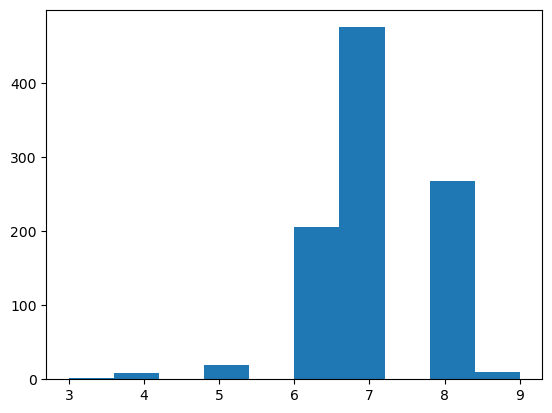

In [54]:
print(CV_clf.best_params_)
print(sum(labels == 7)/len(labels))
plt.hist(labels)

# Old code (I think Lieve's :))

In [55]:
# clean data by dropping NA values

cleaned_data = df[df['value'] != 'NA'].dropna()

# TODO: remove outliers for each variable and write in report why/how

print(cleaned_data)

              id       time variable   value
1        AS14.01 2014-02-26     mood   6.000
2        AS14.01 2014-02-26     mood   6.000
3        AS14.01 2014-02-26     mood   6.000
4        AS14.01 2014-02-26     mood   7.000
5        AS14.01 2014-02-27     mood   6.000
...          ...        ...      ...     ...
2770399  AS14.30 2014-04-11     util   8.032
2772465  AS14.30 2014-04-19     util   3.008
2774026  AS14.30 2014-04-26     util   7.026
2774133  AS14.30 2014-04-27     util  23.033
2784435  AS14.32 2014-04-07     util  22.431

[341443 rows x 4 columns]


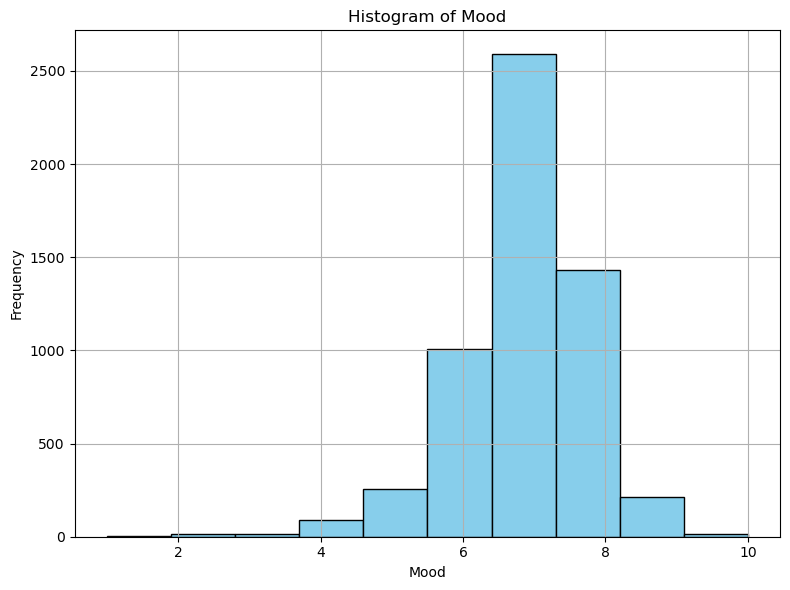

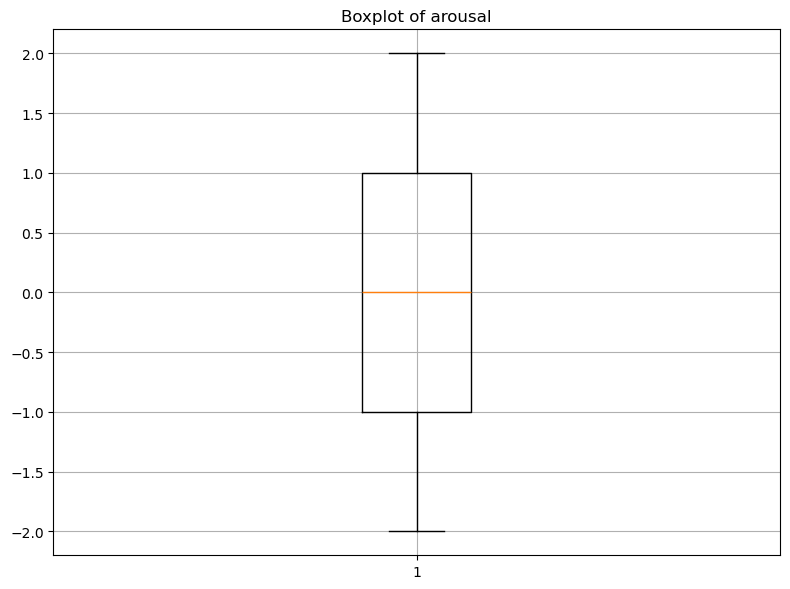

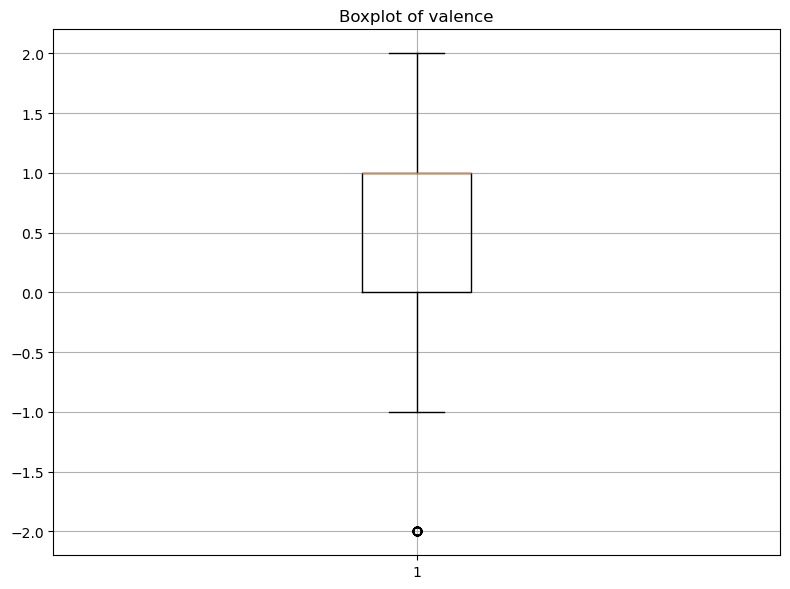

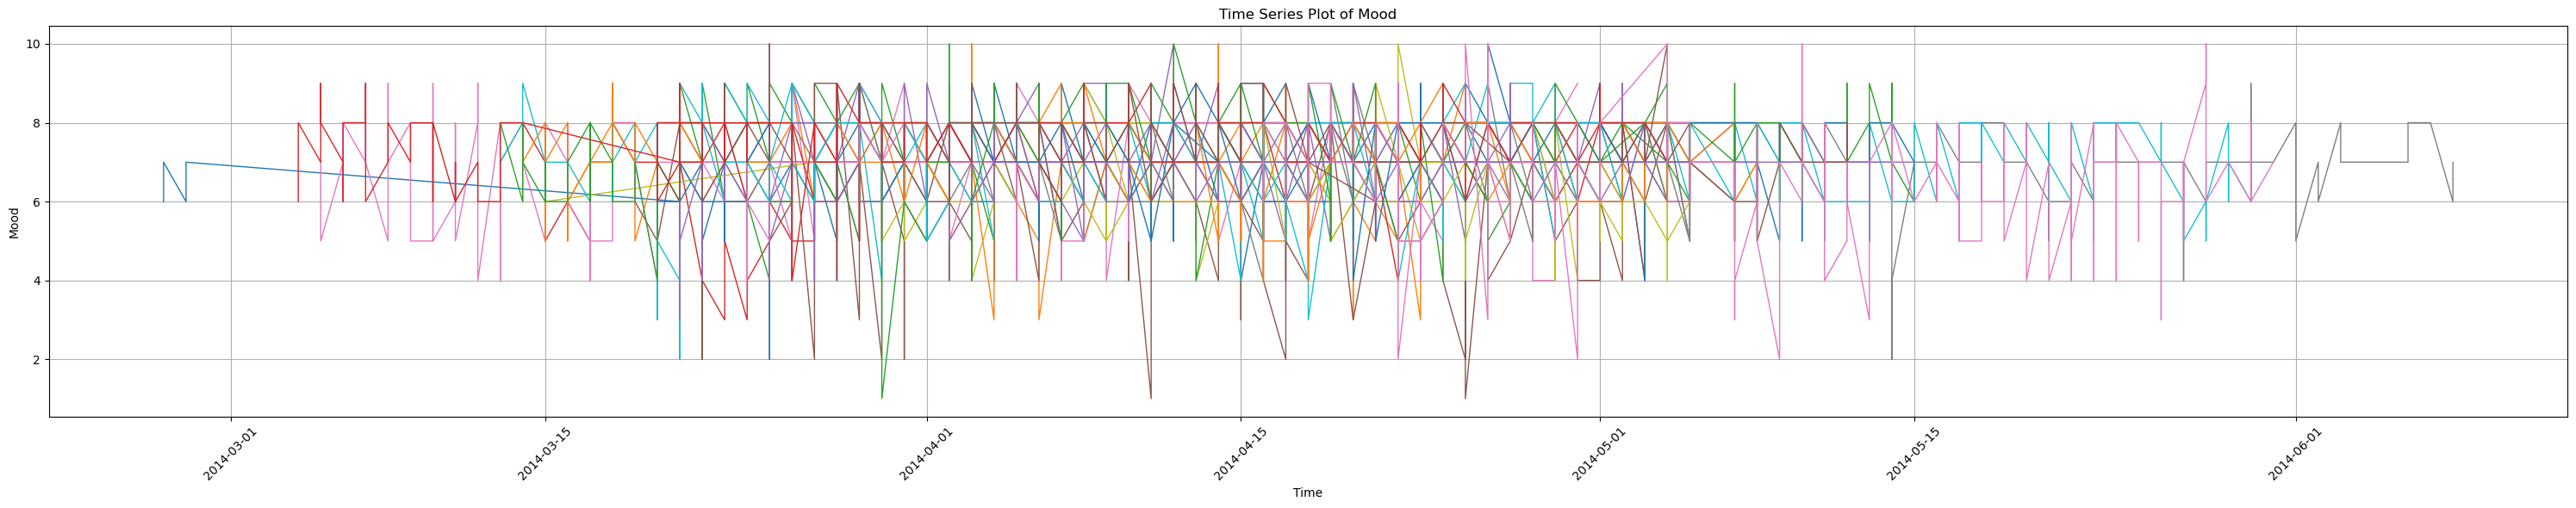

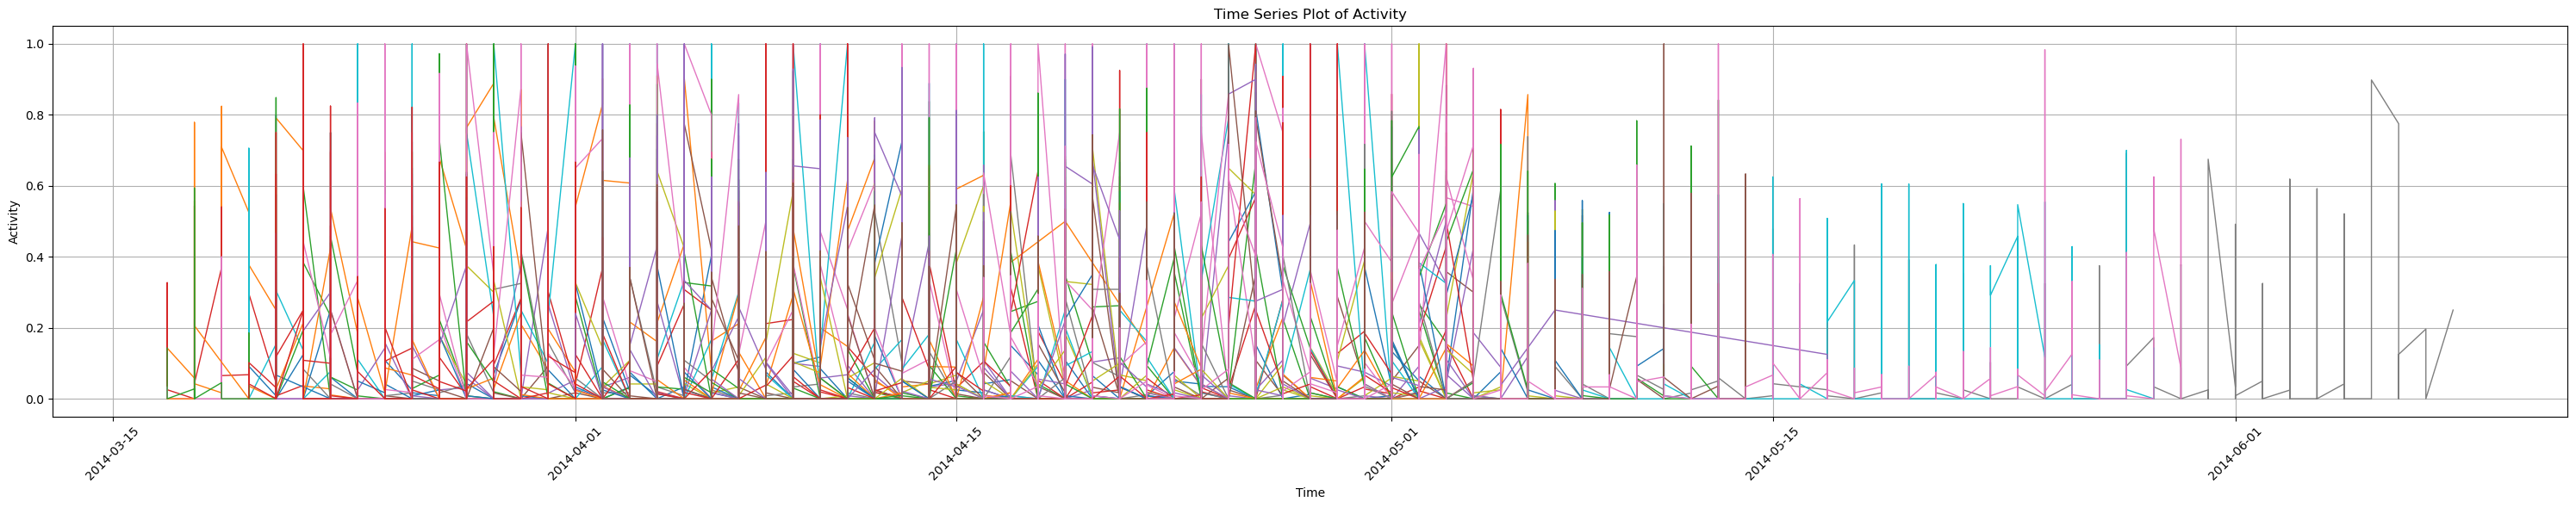

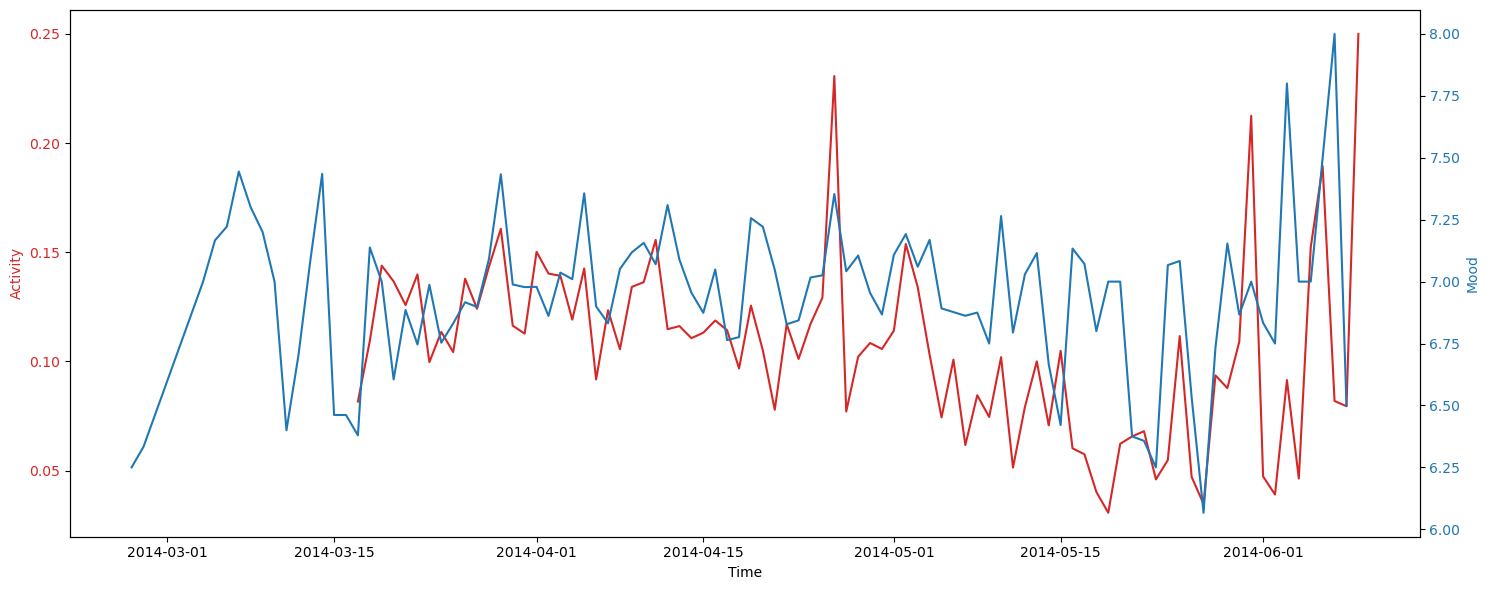

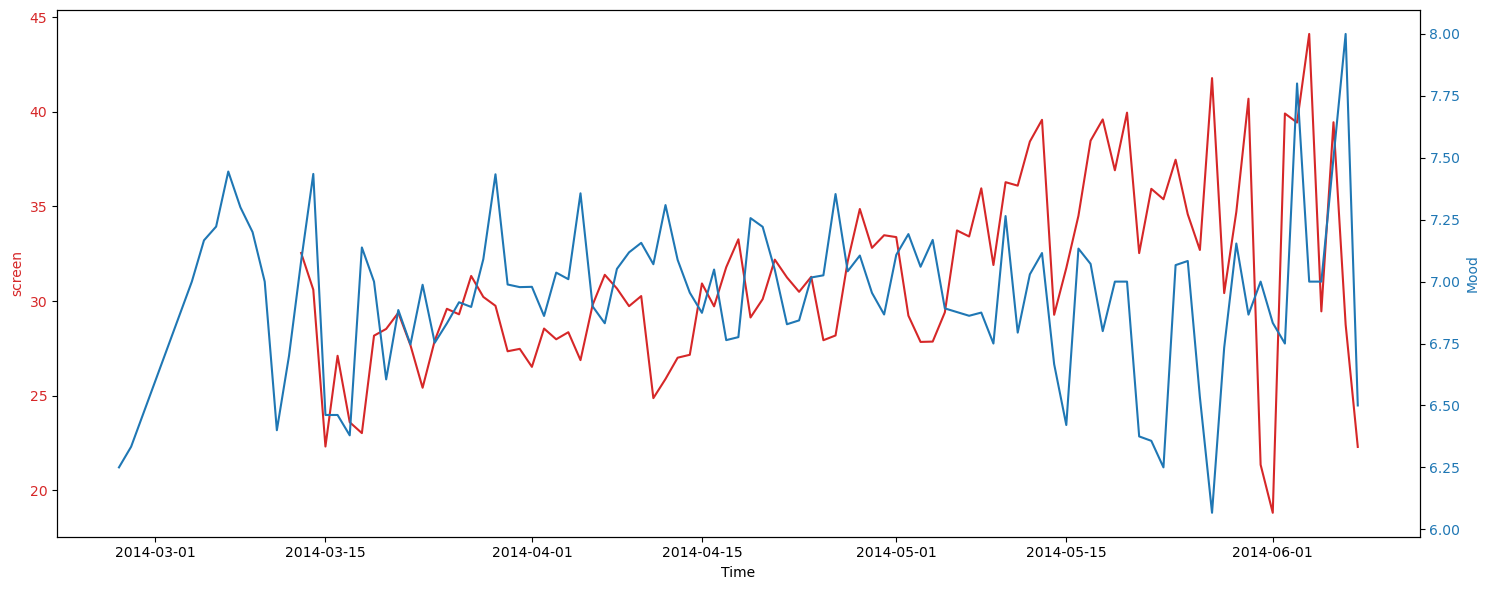

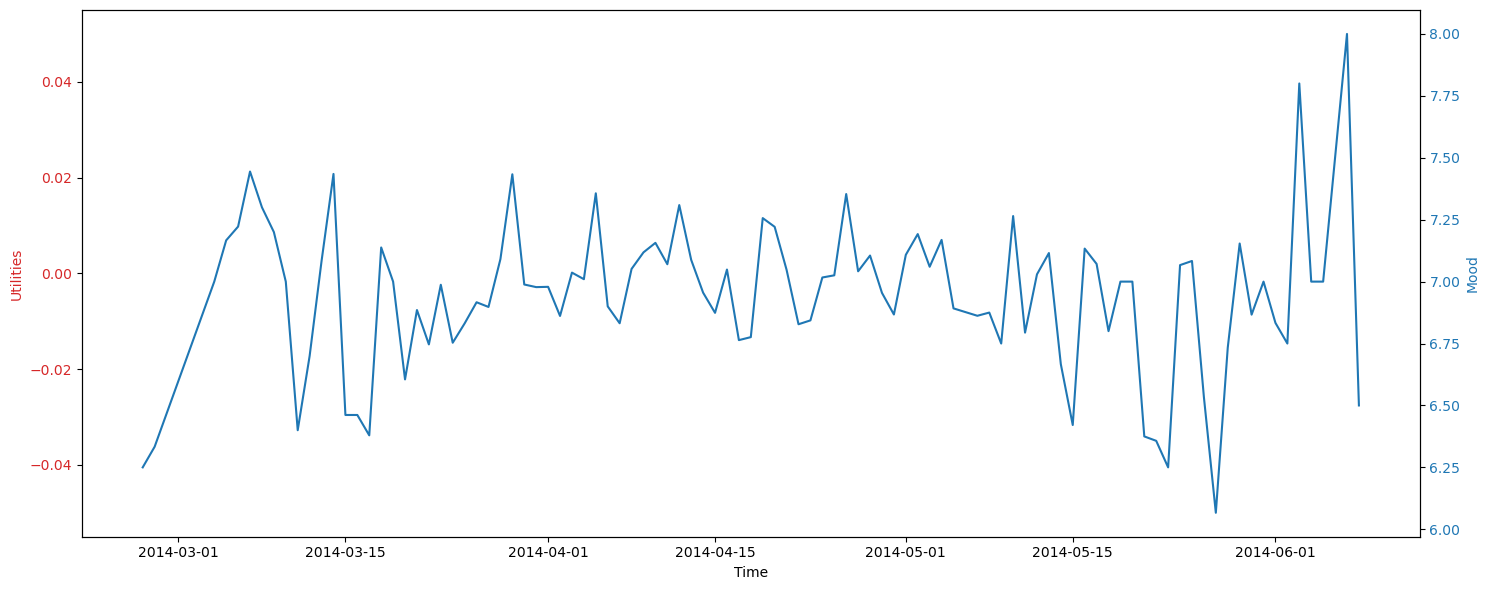

In [56]:
# Histogram of mood 
plt.figure(figsize=(8, 6))
plt.hist(cleaned_data[cleaned_data['variable'] == 'mood']['value'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Mood')
plt.xlabel('Mood')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


# Boxplot of arousal 
plt.figure(figsize=(8, 6))
plt.boxplot(cleaned_data[cleaned_data['variable'] == 'circumplex.arousal']['value'], vert=True)
plt.title('Boxplot of arousal')
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot of valence 
plt.figure(figsize=(8, 6))
plt.boxplot(cleaned_data[cleaned_data['variable'] == 'circumplex.valence']['value'], vert=True)
plt.title('Boxplot of valence')
plt.grid(True)
plt.tight_layout()
plt.show()

# Time series plot of mood
# TODO: fix errors and readability of plot
grouped_data = cleaned_data.groupby('id')

# Plot for each 'id'
plt.figure(figsize=(30, 6))
for name, group in grouped_data:
    plt.plot(group.loc[cleaned_data['variable'] == 'mood','time'], group.loc[cleaned_data['variable'] == 'mood','value'], label=name, linewidth=1)
    # plt.plot(group['time'], group['value'], label=name, linewidth=1)
    # plt.plot(cleaned_data[cleaned_data['variable'] == 'mood']['time'], cleaned_data[cleaned_data['variable'] == 'mood']['value'], linewidth=1)

plt.title('Time Series Plot of Mood')
plt.xlabel('Time')
plt.ylabel('Mood')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Time series of activity
# TODO: fix errors and readability of plot
grouped_data = cleaned_data.groupby('id')

# Plot for each 'id'
plt.figure(figsize=(30, 6))
for name, group in grouped_data:
    plt.plot(group.loc[cleaned_data['variable'] == 'activity','time'], group.loc[cleaned_data['variable'] == 'activity','value'], label=name, linewidth=1)
    # plt.plot(group['time'], group['value'], label=name, linewidth=1)
    # plt.plot(cleaned_data[cleaned_data['variable'] == 'mood']['time'], cleaned_data[cleaned_data['variable'] == 'mood']['value'], linewidth=1)

plt.title('Time Series Plot of Activity')
plt.xlabel('Time')
plt.ylabel('Activity')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Time series of activity AND mood

avg_activity = cleaned_data[cleaned_data['variable'] == 'activity'].groupby(cleaned_data['time'].dt.date)['value'].mean()
avg_mood = cleaned_data[cleaned_data['variable'] == 'mood'].groupby(cleaned_data['time'].dt.date)['value'].mean()

fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.set_xlabel('Time')
ax1.set_ylabel('Activity', color='tab:red')
ax1.plot(avg_activity.index, avg_activity.values, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx() 
ax2.set_ylabel('Mood', color='tab:blue')
ax2.plot(avg_mood.index, avg_mood.values, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout() 
plt.show()

# Time series of screen AND mood
avg_screen = cleaned_data[cleaned_data['variable'] == 'screen'].groupby(cleaned_data['time'].dt.date)['value'].mean()

fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.set_xlabel('Time')
ax1.set_ylabel('screen', color='tab:red')
ax1.plot(avg_screen.index, avg_screen.values, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx() 
ax2.set_ylabel('Mood', color='tab:blue')
ax2.plot(avg_mood.index, avg_mood.values, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout() 
plt.show()

# Time series of utilities app and mood
avg_ut = cleaned_data[cleaned_data['variable'] == 'appCat.utilities'].groupby(cleaned_data['time'].dt.date)['value'].mean()

fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.set_xlabel('Time')
ax1.set_ylabel('Utilities', color='tab:red')
ax1.plot(avg_ut.index, avg_ut.values, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx() 
ax2.set_ylabel('Mood', color='tab:blue')
ax2.plot(avg_mood.index, avg_mood.values, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout() 
plt.show()

In [57]:
# convert to pandas dataframe
df = pd.DataFrame(cleaned_data, columns=["", "id", "time", "variable", "value"])

groups = df.groupby('variable')['value']

# TODO: fix statistical test so we can remove variables which are not significant

# Perform statistical tests for each variable
for var, group in groups:
    if var != 'mood':
        if len(group.unique()) > 2: 
            f_statistic, p_value = stats.f_oneway(*[group for name, group in groups])
            if p_value < 0.05:
                print(f"Variable '{var}' is significant (p-value: {p_value:.4f}, f stat: {f_statistic})")
            else:
                print(f"Variable '{var}' is not significant (p-value: {p_value:.4f}, f stat: {f_statistic})")

Variable 'activity' is significant (p-value: 0.0000, f stat: 5013.458019141389)
Variable 'appCat.unknown' is significant (p-value: 0.0000, f stat: 5013.458019141389)
Variable 'circumplex.arousal' is significant (p-value: 0.0000, f stat: 5013.458019141389)
Variable 'circumplex.valence' is significant (p-value: 0.0000, f stat: 5013.458019141389)
Variable 'entertainment' is significant (p-value: 0.0000, f stat: 5013.458019141389)
Variable 'other' is significant (p-value: 0.0000, f stat: 5013.458019141389)
Variable 'screen' is significant (p-value: 0.0000, f stat: 5013.458019141389)
Variable 'util' is significant (p-value: 0.0000, f stat: 5013.458019141389)
